# Classification

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

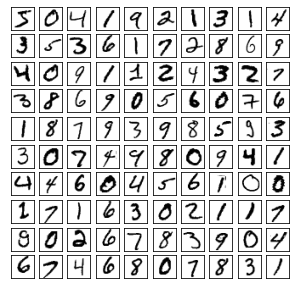

In [25]:
import matplotlib.pyplot as plt
ns = 10
fig, ax = plt.subplots(figsize=(5, 5), nrows=ns, ncols=ns)
for i, data in enumerate(mnist.data.values[:ns*ns]):
    plt.sca(ax[i//ns, i%ns])
    plt.imshow(data.reshape(28, 28), cmap='binary');
    plt.xticks([])
    plt.yticks([])

In [26]:
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

## Training a binary classifier

In [42]:
import numpy as np
y_train_5 = (y_train=="5").astype(int)
y_test_5 = (y_test=="5").astype(int)

In [45]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=0)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=0)

In [47]:
p_train_5 = sgd_clf.predict(X_train)

### Measuring accuracy using cross-validation

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn import clone

kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_i, valid_i in kfold.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_f = X_train.iloc[train_i]
    y_train_f = y_train_5.iloc[train_i]
    
    X_valid_f = X_train.iloc[valid_i]
    y_valid_f = y_train_5.iloc[valid_i]
    clone_clf.fit(X_train_f, y_train_f)
    p_valid_f = clone_clf.predict(X_valid_f)
    n_correct = sum(y_valid_f==p_valid_f)
    print(n_correct / len(y_valid_f))

0.9706666666666667
0.9638333333333333
0.96525
0.9688333333333333
0.97275


In [55]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(sgd_clf, X_train, y_train_5, cv=5, scoring='accuracy')
cvs

### Confusion matrix

In [57]:
from sklearn.model_selection import cross_val_predict
p_cross_val = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [58]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_train_5, p_cross_val)
print(cf)

[[52931  1648]
 [  922  4499]]


In [60]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(precision_score(y_train_5, p_cross_val))
print(recall_score(y_train_5, p_cross_val))
print(f1_score(y_train_5, p_cross_val))

0.7319017406865137
0.8299206788415422
0.77783540802213
